# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

dataset = pd.read_csv('auto-mpg.csv')        #reads csvdata and stores it into 'dataset'
numData = dataset.iloc[:,:5]                 #gets the first 5 columns worth of data


<AxesSubplot:>

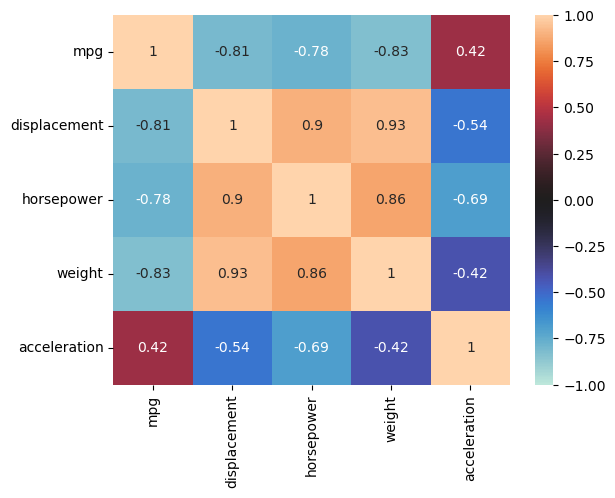

In [2]:
sns.heatmap(numData.corr(),annot=True,vmin=-1,vmax=1,center=0)
#plots the data, vmin,vmax and center are our min,max and center values respectively

In [3]:
'''
Question: If we are going to predict mpg in Simple Linear Regression(i.e.,  𝑦=𝑎𝑥+𝑏 ), 
which attribute are you most UNLIKELY to pick as the independent variable? Explain why.

Answer: I would be least likely to pick the weight attribute as the independent variable because
according to our graph it holds the least correlation with the attribute we want to predict. 

'''

'\nQuestion: If we are going to predict mpg in Simple Linear Regression(i.e.,  𝑦=𝑎𝑥+𝑏 ), \nwhich attribute are you most UNLIKELY to pick as the independent variable? Explain why.\n\nAnswer: I would be least likely to pick the weight attribute as the independent variable because\naccording to our graph it holds the least correlation with the attribute we want to predict. \n\n'

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

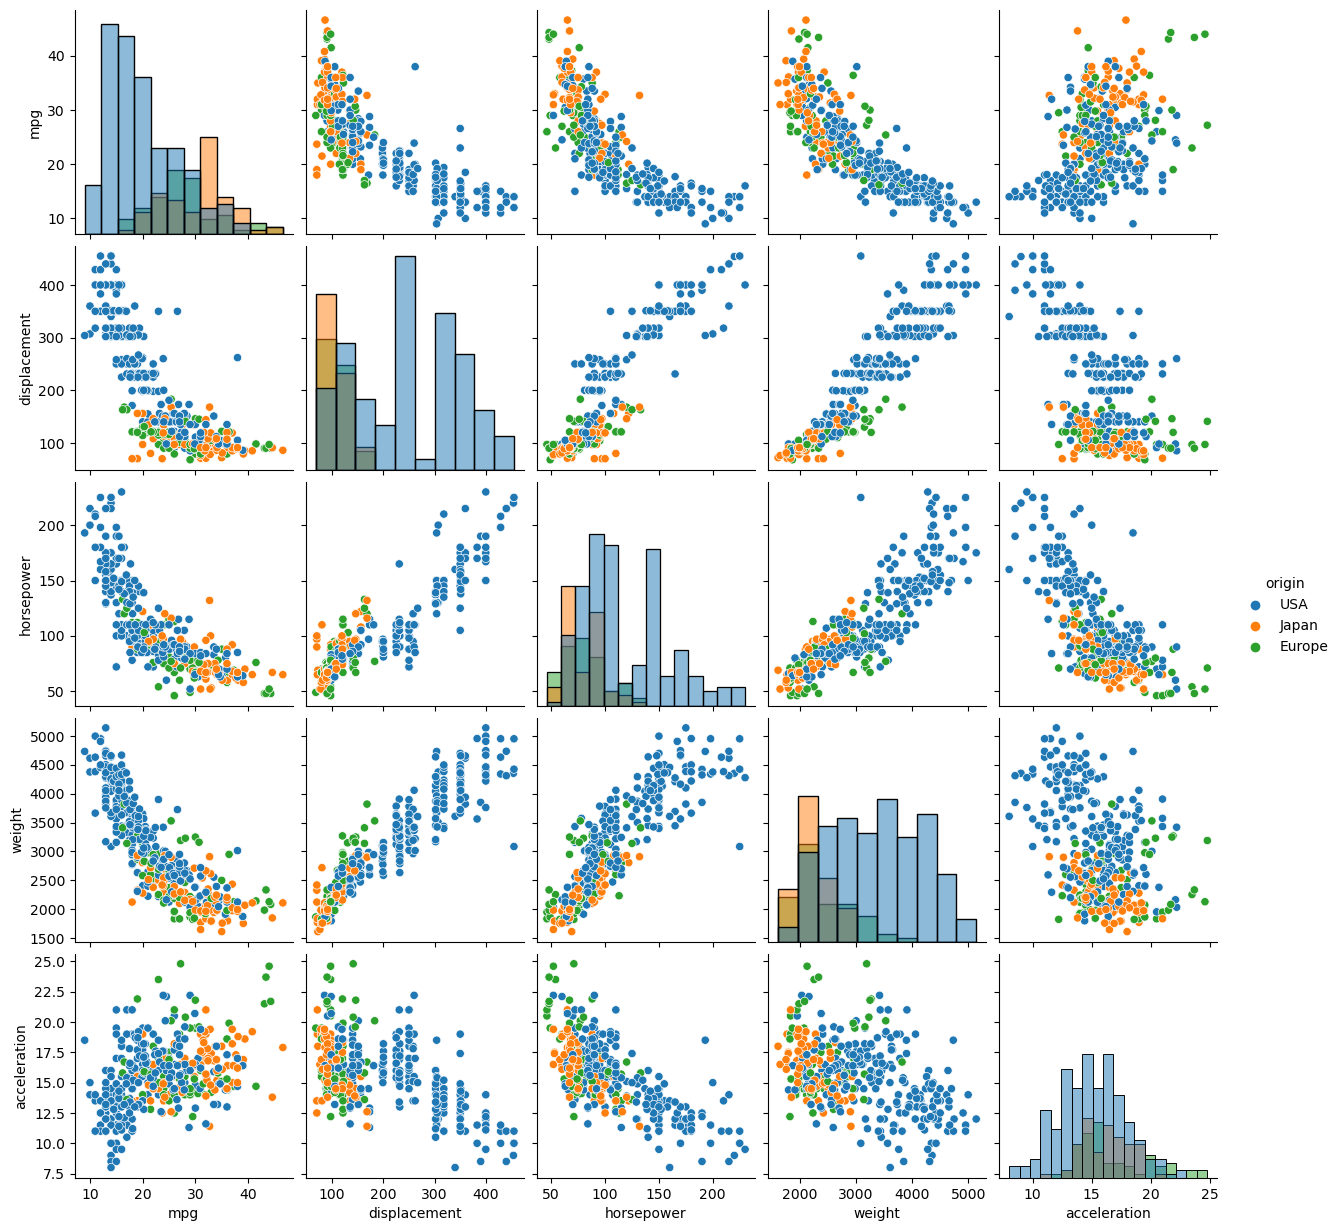

In [4]:
sns.pairplot(dataset,hue='origin',diag_kind='hist')
#creates a pairplot and sets the diagonals to histogram outputs

In [5]:
'''
Question: If we are using horsepower to predict mpg, which method could lead to the best performance? 
(Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.

Answer:Polynomial regression can result in the best because we can't make a line through the data 
and assume a linear relationship between the two. This is why polynomial regression would be good in this 
case as it can create more complex lines based on our data and the complexities that it may hold. 
'''


"\nQuestion: If we are using horsepower to predict mpg, which method could lead to the best performance? \n(Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.\n\nAnswer:Polynomial regression can result in the best because we can't make a line through the data \nand assume a linear relationship between the two. This is why polynomial regression would be good in this \ncase as it can create more complex lines based on our data and the complexities that it may hold. \n"

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [6]:
from sklearn.model_selection import train_test_split

In [61]:
x = numData[['acceleration']]
y = numData['mpg']#the attributes we are going to be training with later

#splitting the data by making test_size = 0.2; meaning 20% of data will be added to test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
model = LinearRegression().fit(x_train,y_train) #creates model and fits it with the mpg and acceleration

y_prediction = model.predict(x_test)        #makes predictions on our testing set

mse = mean_squared_error(y_test,y_prediction)#calculate the mse with our prediction values
print("The MSE error is:",mse)

The MSE error is: 47.84827440608694


### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [68]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train = x
y_train = y

for i in range(2,5):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    x_poly = poly.fit_transform(x)

    x_poly_train = x_poly[:-20]
    y_train = y[:-20]

    x_poly_test = x_poly[-20:]
    y_test = y[-20:]

    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    y_train_pred = model.predict(x_poly_train)
    y_test_pred = model.predict(x_poly_test)
    
    mse1 = mean_squared_error(y_train,y_train_pred)
    mse2 = mean_squared_error(y_test,y_test_pred)
    
    
    print('Degree#',i)
    print('Training:',mse1)
    print('Testing Error:',mse2)
  
    

Degree# 2
Training: 45.56350157985324
Testing Error: 117.0075493172848
Degree# 3
Training: 45.560122991500535
Testing Error: 117.93557024060337
Degree# 4
Training: 44.88078004382226
Testing Error: 107.67882951853315


In [ ]:
'''
Question:  do you think there is a sign of overfitting? Provide your reasoning.

Answer: No I don't think there was overfitting as the training error is generally decreasing
as we increase the degree of the polynomial. However, more tests need to be to be done to
confirm for sure.
'''

## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the 'BloodPressure' attribute.<br >
Highlight the outliers in the box plot with special colors.

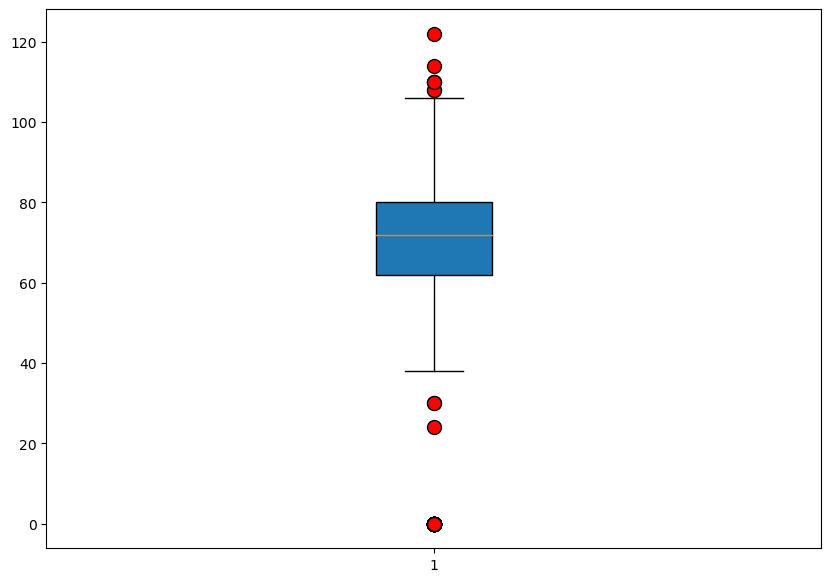

In [44]:
dataset1 = pd.read_csv('diabetes.csv') 
x = dataset1['BloodPressure']

fig,out = plt.subplots(figsize=(10,7))
out.boxplot(x,showfliers=True, patch_artist=True,flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.show()

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

In [46]:
from sklearn.svm  import OneClassSVM
from numpy import where

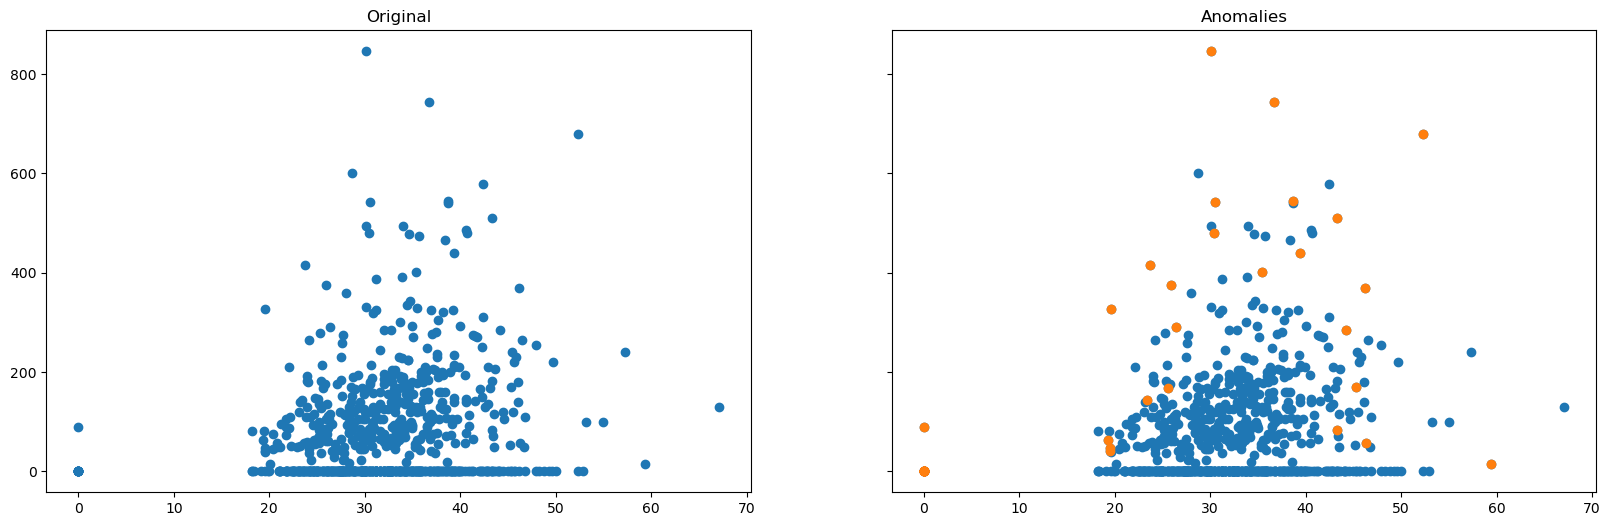

In [54]:
relevant_features = [
    "BMI",
    "Insulin"
]
data = dataset1[relevant_features]

input = data.to_numpy()
svm = OneClassSVM(kernel='rbf',gamma=0.001,nu=0.03)

svm.fit(input)
pred = svm.predict(input) 

anom_index= where(pred==-1)
values = input[anom_index]

fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))


ax0.set_title('Original')
ax0.scatter(data["BMI"], data["Insulin"], cmap='rainbow')

ax1.set_title('Anomalies')
ax1.scatter(input[:,0], input[:,1])
ax1.scatter(values[:,0], values[:,1], cmap='rainbow')
